$$\require{mhchem}$$       

# Catalyst deactivation in a batch reactor

Consider the irreversible, liquid-phase isomerization reaction carried out in a solvent containing dissolved catalyst at 25 C in a batch reactor:
\begin{align*}
\ce{B ->[k_b] C}
\end{align*}
The apparent first-order reaction rate constant $k_b$ decreases with time because of catalyst deterioriation. A chemist friend of yours has studied the catalyst deactivation process and has proposed that it can be modeled with
\begin{align*}
k_b = \frac{k}{1+k_dt}
\end{align*}
in which $k$ is the fresh catalyst rate constant and $k_d$ is the deactivation rate constant. 

## Write down the mole balance for this reactor and initial conditions.

\begin{align*}
\frac{dC_b}{dt}=r_b=-k_b C_B = -\frac{k}{1+k_dt}C_B
\end{align*}

## If we're only interested in % conversion of B, does it matter what the initial concentration of B is? Why?

No, it doesn't matter, because the reaction rate is linear. 

## Assume an initial concentration of $C_B$ and solve the mole balance for $C_B(t)$ assuming $k$=0.6/hr and $k_d$=2/hr. Plot the conversion % for your solution.

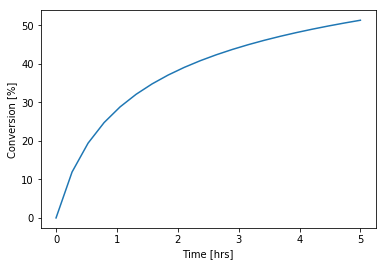

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

k = 0.6  # 1/hr
kd = 2  # 1/hr
Cb0 = 1


def ode(Cb, t):
    dCbdt = -k/(1+kd*t)*Cb
    return dCbdt


tspan = np.linspace(0, 5, 20)
sol = odeint(ode, Cb0, tspan)

plt.plot(tspan, (1-sol/Cb0)*100)
plt.xlabel('Time [hrs]')
plt.ylabel('Conversion [%]')
plt.show()

## If it takes two hours to reach 50% conversion and the fresh catalyst has a rate constant of 0.6/hr what is the actual $k_d$?

In [4]:
from scipy.optimize import fsolve


def ode(Cb, t, kd):
    dCbdt = -k/(1+kd*t)*Cb
    return dCbdt


def conversion(kd):
    tspan = np.linspace(0, 2)
    sol = odeint(ode, Cb0, tspan, args=(kd,))
    return (1-sol[-1]/Cb0)*100-50


kd_solved = fsolve(conversion, 1)
print('Actual kd = %1.2f/hr' % kd_solved)

Actual kd = 0.88/hr


## Using $k_d$ from 1.3, how long does it take to reach 75% conversion?

In [6]:
def conversion_tmax(tmax):
    tspan = np.linspace(0, tmax)
    sol = odeint(ode, Cb0, tspan, args=(kd_solved,))
    return (1-sol[-1]/Cb0)*100-75


def ode_2(Cb, t):
    dCbdt = -k/(1+2*t)*Cb
    return dCbdt

def conversion_tmax_2(tmax):
    tspan = np.linspace(0, tmax)
    sol = odeint(ode_2, Cb0, tspan)
    return (1-sol[-1]/Cb0)*100-75

t75 = fsolve(conversion_tmax, 1)
t75_2 = fsolve(conversion_tmax_2, 1)
print('Time to reach 75%% conversion using kd from 1.3 = %1.2f/hr' % t75_2)
print('Time to reach 75%% conversion using kd from 1.4 = %1.2f/hr' % t75)

Time to reach 75% conversion using kd from 1.3 = 50.30/hr
Time to reach 75% conversion using kd from 1.4 = 7.51/hr


## Say that we can stop the batch process after 2 hours, filter the spent catalyst, and replace with fresh catalyst. Solve and plot for $C_B(t)$ over 5 hours, and include the plot with the catalyst refresh. Include a legend on the plot to label each solution

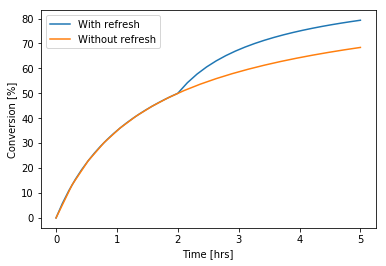

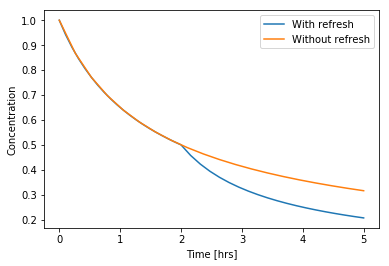

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

k = 0.6  # 1/hr
kd = kd_solved  # 1/hr
Cb0 = 1


def ode(Cb, t):
    dCbdt = -k/(1+kd*t)*Cb
    return dCbdt


tspan = np.linspace(0, 2, 20)
sol = odeint(ode, Cb0, tspan)
tspan2 = np.linspace(0, 3, 20)
sol2 = odeint(ode, sol[-1], tspan2)

plt.plot(np.append(tspan, tspan2+2), 
         np.append((1-sol/Cb0)* 100, (1-sol2/Cb0)*100), label='With refresh')

tspan = np.linspace(0, 5, 20)
sol = odeint(ode, Cb0, tspan)

plt.plot(tspan, (1-sol/Cb0)*100, label='Without refresh')
plt.legend()
plt.xlabel('Time [hrs]')
plt.ylabel('Conversion [%]')
plt.show()

tspan = np.linspace(0, 2, 20)
sol = odeint(ode, Cb0, tspan)
tspan2 = np.linspace(0, 3, 20)
sol2 = odeint(ode, sol[-1], tspan2)

plt.plot(np.append(tspan, tspan2+2), np.append(sol, sol2), label='With refresh')

tspan = np.linspace(0, 5, 20)
sol = odeint(ode, Cb0, tspan)

plt.plot(tspan, sol, label='Without refresh')
plt.legend()
plt.xlabel('Time [hrs]')
plt.ylabel('Concentration')
plt.show()

# Transient CSTR 

Consider a first-order liquid-phase reaction in an isothermal CSTR
\begin{align*}
\ce{A->[k] 2B}, r=kC_A
\end{align*}
The feed concentration of A is $C_{Af}=2$mol/L, the volume of the reactor is 100 L, the flow rate is 3L/min, and the rate constant is $k=0.1$/min. 

## Write the mole balance for A in this reactor

\begin{align}
\frac{dC_A}{dt} = \frac{\nu (C_{Af}-C_A) + V r_A}{V}
\end{align}



## Find the steady state concentration of A

In [72]:
V = 100  # L
nu = 3  # L/min
k = 0.1  # 1/min
Caf = 2  # mol/L


def mol_balance(Ca):
    ra = -k*Ca
    dCadt = (nu*(Caf-Ca) + V*ra)/V
    return dCadt


steady_state = fsolve(mol_balance, 2)

print('The steady state concentraiton is %1.2f mol/L' % steady_state[-1])

The steady state concentraiton is 0.46 mol/L


## Plot the concentration of A versus time for constant feed concentration if initial concentration of A and B is 0 mol/L over 20 hours. Also include a horizontal black dashed line indicating the steady state concentration.

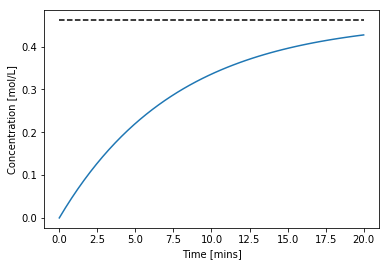

In [75]:
from scipy.integrate import odeint


def ode(Ca, t):
    ra = -k*Ca
    dCadt = (nu*(Caf-Ca) + V*ra)/V
    return dCadt


tspan = np.linspace(0, 20)
sol = odeint(ode, 0, tspan)

plt.plot(tspan, sol)
plt.xlabel('Time [mins]')
plt.ylabel('Concentration [mol/L]')
plt.plot(tspan, tspan*0+steady_state[-1], 'k--')
plt.show()

## Plot the concentration of A versus time for constant feed concentration if initial concentration of A and B is 2 mol/L

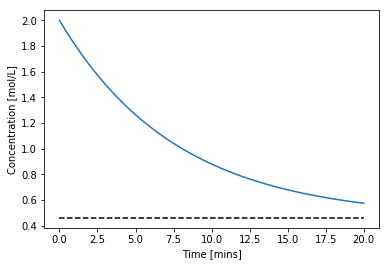

In [76]:
from scipy.integrate import odeint


def ode(Ca, t):
    ra = -k*Ca
    dCadt = (nu*(Caf-Ca) + V*ra)/V
    return dCadt


tspan = np.linspace(0, 20)
sol = odeint(ode, 2, tspan)

plt.plot(tspan, sol)
plt.xlabel('Time [mins]')
plt.ylabel('Concentration [mol/L]')
plt.plot(tspan, tspan*0+steady_state[-1], 'k--')
plt.show()

## For 2.3, how long does it take to reach 75% of the steady state conversion?

In [81]:
def ode(Ca, t):
    ra = -k*Ca
    dCadt = (nu*(Caf-Ca) + V*ra)/V
    return dCadt


def conversion(tmax):
    tspan = np.linspace(0, tmax)
    sol = odeint(ode, 0, tspan)
    return sol[-1]/steady_state-0.75


tsol = fsolve(conversion, 7.5)
print('Time to hit 75%% conversion = %1.2f min' % tsol)

Time to hit 75% conversion = 10.66 min
